## M. Amintoosi
## کاوش الگوهای پرتکرار
استخراج قوانین انجمنی

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/colabs/CoWork/Kohan

/content/drive/My Drive/colabs/CoWork/Kohan


In [4]:
!pip3 install Orange3-Associate
!pip install pyvis

     |████████████████████████████████| 532kB 5.4MB/s 
     |████████████████████████████████| 2.7MB 8.4MB/s 
     |████████████████████████████████| 460kB 26.7MB/s 
     |████████████████████████████████| 235kB 31.6MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 153kB 23.6MB/s 
     |████████████████████████████████| 1.8MB 26.5MB/s 
     |████████████████████████████████| 68.3MB 54kB/s 
     |████████████████████████████████| 67.7MB 114kB/s 
     |████████████████████████████████| 808kB 44.0MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 286kB 48.8MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 2.6MB 43.9MB/s 
     |████████████████████████████████| 102kB 12.1MB/s 
  Creat

In [5]:
import pandas as pd
import numpy as np
from orangecontrib.associate.fpgrowth import *
from itertools import tee
from tqdm import tqdm

# df = pd.read_excel(r'matrix20.xlsx') 
df = pd.read_excel(r'data/403.xlsx') 
# print (df)
# metabolitNames = df.head(0).to_string()
plantNames = list(df.head(0))

In [6]:
numpy_matrix = df.values
d =  numpy_matrix.transpose()
T = [[str(i)[3:] for i in row ] for row in d]
T = [[int(i) for i in row if i != ''] for row in T]
# T[0][:20]

In [7]:
minFreq = 10
itemsets = frequent_itemsets(T, minFreq)
freqIS_list = list(itemsets)
n_freqIS = len(freqIS_list)
print(n_freqIS)

680


In [8]:
itemSetNo = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemSetNo[i] = len(item[0])

fileName = "results/"+str(minFreq)+"_common_metabolite_set_number_order"+".txt"
output = open(fileName, 'w')
n = 1
prevSetNo = -1
with tqdm(total=n_freqIS) as progress_bar:
  for k in np.unique(itemSetNo):
      nSetNo = k
      freqIS = iter(freqIS_list)
      for i,item in enumerate(freqIS):
          set_i = item[0]
          thisSetNo = len(set_i)
          if(thisSetNo==nSetNo and prevSetNo != thisSetNo):
              output.write("======= sets with %d elements =======\n"% nSetNo)
          if(thisSetNo==nSetNo):
              items = [x for x in set_i]
              output.write("%d %s %d\n" % (n,items,item[1]))
              n = n+1
              prevSetNo = thisSetNo
              progress_bar.update(1) # update progress
output.close() 

100%|██████████| 680/680 [00:00<00:00, 63874.56it/s]


In [9]:
# len(freqIS)
# تعداد فایل از این کمتر است به این دلیل که یک دانه‌ای ها را نمایش نمی دهیم

In [10]:
itemFreq = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemFreq[i] = item[1]

fileName = "results/"+str(minFreq)+"_common_metabolite_freq_number_order"+".txt"
output = open(fileName, 'w')
n = 1
prevFreq = -1
with tqdm(total=n_freqIS) as progress_bar:
  for k in np.unique(itemFreq):
      nFreq = k
      freqIS = iter(freqIS_list)
      for i,item in enumerate(freqIS):
          set_i = item[0]
          thisFreq = item[1]
          if(thisFreq==nFreq and prevFreq != thisFreq):
              output.write("======= sets with frequency=%d =======\n"% nFreq)
          if(thisFreq==nFreq):
              items = [x for x in set_i]
              output.write("%d %s\n" % (n,items))
              n = n+1
              prevFreq = thisFreq
              progress_bar.update(1) # update progress

output.close() 

100%|██████████| 680/680 [00:00<00:00, 37896.48it/s]


In [11]:
corpus = [None] * len(T)
for i in range(len(T)):
    listToStr = ' '.join([str(elem) for elem in T[i]]) 
    corpus[i] = listToStr

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
X = vectorizer.fit_transform(corpus)
print(X.shape)
# print(X.toarray())
bow = X.toarray()
# print(bow[0] & bow[2])
# print(sum(bow[0] & bow[2]))

(403, 7416)


In [13]:
featureNames = vectorizer.get_feature_names()
type(featureNames)
featureNames[:5]

['1', '10', '100', '1000', '10004']

In [14]:
itemFreq = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemFreq[i] = item[1]

nCol = len(T)    
# G = np.zeros([nCol,nCol])  
    
fileName = "results/"+str(minFreq)+"_common_plantNo_freq"+".txt"
output = open(fileName, 'w')
n = 1
prevFreq = -1
# حلقه زیر نیاز به بازنویسی دارد. فقط روی فرکانسهای موجود باید حرکت بشه نه از اول شروع کنیم و یکی یکی ...
# unique(itemFreq)
# انجام شد
with tqdm(total=n_freqIS) as progress_bar:
  for k in np.unique(itemFreq):
      nFreq = k
      freqIS = iter(freqIS_list)
      for i,item in enumerate(freqIS):
          set_i = item[0]
          thisFreq = item[1]
          if(thisFreq==nFreq and prevFreq != thisFreq):
              output.write("======= sets with frequency=%d =======\n"% nFreq)
          if(thisFreq==nFreq):
              items = [x for x in set_i]
              commItems_idx = [featureNames.index(str(x)) for x in list(items)]
  #             print(commItems_idx)
              w = len(commItems_idx)

              metabolits_list = [featureNames[int(ii)] for ii in commItems_idx]
              output.write("%d %s --" % (n,metabolits_list))
              
              vec = np.zeros((len(bow[0]),), dtype=int)
              vec[commItems_idx] = 1;
              commItems = []
              for j in range(len(bow)):
                  row = bow[j]
                  if sum(row&vec)== w:
                      commItems.append(j)
                      
  # #          commItems = [rowIdx for row in bow if sum(row&vec)!=0]
              output.write(" %s \n" % (commItems))
              # for ii in range(len(commItems)):
              #     for jj in range(ii):
              #         src = commItems[ii]
              #         dst = commItems[jj]
              #         G[src,dst] += 1
  #                     G[jj,ii] += w
      
  #             col_list = [metabolitNames[int(ii)] for ii in commItems]
  #             output.write(" %s \n" % (col_list))
          
              n = n+1
              prevFreq = thisFreq
              progress_bar.update(1) # update progress

output.close() 

100%|██████████| 680/680 [05:51<00:00,  1.94it/s]


In [15]:
itemFreq = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemFreq[i] = item[1]

nCol = len(T)    
# G = np.zeros([nCol,nCol])  
    
fileName = "results/"+str(minFreq)+"_common_plantName_freq"+".txt"
output = open(fileName, 'w')
n = 1
prevFreq = -1
with tqdm(total=n_freqIS) as progress_bar:
  for k in np.unique(itemFreq):
      nFreq = k
      freqIS = iter(freqIS_list)
      for i,item in enumerate(freqIS):
          set_i = item[0]
          thisFreq = item[1]
          if(thisFreq==nFreq and prevFreq != thisFreq):
              output.write("======= sets with frequency=%d =======\n"% nFreq)
          if(thisFreq==nFreq):
              items = [x for x in set_i]
              commItems_idx = [featureNames.index(str(x)) for x in list(items)]
  #             print(commItems_idx)
              w = len(commItems_idx)

              metabolits_list = [featureNames[int(ii)] for ii in commItems_idx]
              output.write("%d %s --" % (n,metabolits_list))
              
              vec = np.zeros((len(bow[0]),), dtype=int)
              vec[commItems_idx] = 1;
              commItems = []
              for j in range(len(bow)):
                  row = bow[j]
                  if sum(row&vec)== w:
                      commItems.append(plantNames[j])
                      
  # #          commItems = [rowIdx for row in bow if sum(row&vec)!=0]
              output.write(" %s \n" % (commItems))
          
              n = n+1
              prevFreq = thisFreq
              progress_bar.update(1) # update progress

output.close() 

100%|██████████| 680/680 [05:31<00:00,  2.05it/s]


In [16]:
# ایجاد گراف برای نمایش
itemFreq = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemFreq[i] = item[1]

nCol = len(T)    
G = np.zeros([nCol,nCol])  
Gw = np.zeros([nCol,nCol])  
MIN_FREQ = 10
prev_minFreq = minFreq
minFreq = MIN_FREQ
with tqdm(total=n_freqIS) as progress_bar:
    freqIS = iter(freqIS_list)
    for i,item in enumerate(freqIS):
        set_i = item[0]
        thisFreq = item[1]
        if(thisFreq >= minFreq):
            items = [x for x in set_i]
            commItems_idx = [featureNames.index(str(x)) for x in list(items)]
            w = len(commItems_idx)
            vec = np.zeros((len(bow[0]),), dtype=int)
            vec[commItems_idx] = 1;
            commItems = []
            for j in range(len(bow)):
                row = bow[j]
                if sum(row&vec)== w:
                    commItems.append(j)
            # print(commItems)
            for ii in range(len(commItems)):
                for jj in range(len(commItems)):#range(ii):
                  if(ii != jj):
                    src = commItems[ii]
                    dst = commItems[jj]
                    Gw[src,dst] += w
                    G[src,dst] += 1
        progress_bar.update(1) # update progress

minFreq = prev_minFreq

100%|██████████| 680/680 [05:51<00:00,  1.94it/s]


In [17]:
# G_fileName = "results/"+str(minFreq)+"_G"+".npy"
# with open(G_fileName, 'wb') as f:
#   np.save(f,G)
#   np.save(f,Gw)
#   np.save(f,featureNames)
#   np.save(f,plantNames)
#   np.save(f,bow)

In [18]:
indicesToRemove  = np.where(sum(G)==0)[0]
print(len(indicesToRemove))
# نودهای جدا را حذف کنیم
indices  = np.where(sum(G)!=0)[0] # indices to preserve
subG = G[indices]
subG = subG[:,indices]

138


In [19]:
# from sklearn.cluster import SpectralClustering
# clustering = SpectralClustering(n_clusters=2, assign_labels="discretize",\
#                                 affinity="precomputed",random_state=0).fit(subG)
# labels = clustering.labels_

# indices0 = np.where(labels==0)[0]
# subG0 = G[indices0]
# subG0 = subG0[:,indices0]

# indices1 = np.where(labels==1)[0]
# subG1 = G[indices1]
# subG1 = subG1[:,indices1]

# subG0.sum(),subG1.sum()
# if(subG0.sum() == 0 and subG1.sum() == 0):
#   print('Error, two clusters are zero sum')

# if(subG0.sum()!=0):
#   indices = indices0 # preserved indices
#   subG = subG0
#   labelToPreserve = 0
# else:
#   indices = indices1
#   subG = subG1  
#   labelToPreserve = 1

# print(len(indices0),len(indices1))
# labelToPreserve

In [20]:
# labels.shape
# np.zeros((10,)).shape

In [21]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2, assign_labels="discretize",\
                                affinity="precomputed",random_state=0).fit(subG)
labelsSubG = clustering.labels_
indicesSubG0 = np.where(labelsSubG==0)[0]
indicesSubG1 = np.where(labelsSubG==1)[0]
# print(indicesSubG0)
# print(indices[indicesSubG0]) # اندیس نودها در گراف اصلی
Labels = np.zeros((len(T),),dtype=int)
Labels[indices[indicesSubG0]] = 1
Labels[indices[indicesSubG1]] = 2
labels = Labels
# labels

In [22]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height="750px", width="100%", bgcolor="white", font_color="black")

# set the physics layout of the network
colors = ["red","green","blue"]
got_net.barnes_hut()
with tqdm(total=len(G)*(len(G)+1)/2) as progress_bar:
  for ii in range(len(G)):
      for jj in range(ii):
          w = G[ii,jj]
          progress_bar.update(1) # update progress
          if w!=0:
            src = plantNames[ii]
            dst = plantNames[jj]
            got_net.add_node(src, src, title=plantNames[ii],color=colors[labels[ii]])
            got_net.add_node(dst, dst, title=plantNames[jj],color=colors[labels[jj]])
            got_net.add_edge(src, dst, value=w)
            # if(labels[ii]==2 or labels[jj]==2):
            #   print('b')

100%|█████████▉| 81003/81406.0 [00:05<00:00, 16037.49it/s]


In [23]:
degreeG = G.sum(axis=0)
# degreeG
# colors = ["red","green"]
labels
len(labels)

403

In [24]:
neighbor_map = got_net.get_adj_list()
# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += "<br>" + str(len(neighbor_map[node["id"]]))+ " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

In [25]:
# got_net.show("bestPlants_min_freq_"+str(minFreq)+".html")
got_net.show("results/"+str(minFreq)+"_metabolGraph_w1.html")

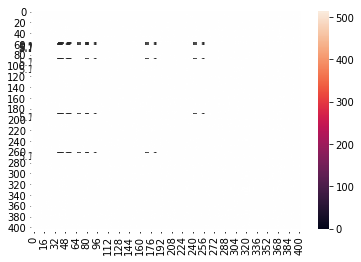

In [26]:
# import seaborn as sns
# sns.heatmap(G, annot=True)

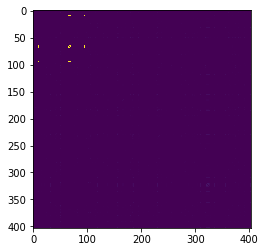

In [27]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(G, interpolation='nearest')
plt.show()

In [28]:
max_n_best_plants = 100
nPlants = np.sum(degreeG != 0)
print(nPlants)
sorted_plants = np.sort(degreeG)[::-1]
sorted_plants_idx = np.argsort(degreeG)[::-1] # Descending order
# print(degreeG[sorted_plants_idx[0]])
bestPlants = sorted_plants_idx[:np.min([nPlants,max_n_best_plants])]
print(bestPlants)
# print(plantNames[bestPlants])
bestPlantNames = [plantNames[x] for x in bestPlants]
# bestPlants_fileName = "results/"+str(minFreq)+"_bestPlants"+".npy"
# with open(bestPlants_fileName, 'wb') as f:
#   np.save(f,bestPlantNames)


265
[ 68  10 197  67  69 269 107  65  66  95  50  53  40 208 279 156 230 105
  49 310 245 201 314 324 320 321 322 402 327 335 195 179 345 312 185 119
 205 151 183 355  32 180 290 390 379  70 336 326 347 309 103 114 316 361
 281 273 358 136 137 377  82 194 374 362 304 242 275 368 106  29 115   4
 295 318  43 210 237 294 233 168 393 401 287 158  99  24  14 298 299 102
 153 203  31 165  88 167 308 372  35 363]


In [ ]:
# set(bestPlants) & set(np.where(labels==1)[0])

In [30]:
# sorted_plants

In [31]:
# MIN_FREQ = 40
# prev_minFreq = minFreq
# minFreq = MIN_FREQ

# subG = G[bestPlants,:]
# subG = subG[:,bestPlants]
best_net = Network(height="750px", width="100%", bgcolor="white", font_color="black")

# set the physics layout of the network
best_net.barnes_hut()
with tqdm(total=len(bestPlants)*(len(bestPlants)-1)/2) as progress_bar:
  for ii in range(len(G)):
    if(ii in bestPlants):
      for jj in range(ii):
        if(jj in bestPlants):
          w = Gw[ii,jj]
          progress_bar.update(1) # update progress
          if w!=0:
              src = plantNames[ii]
              dst = plantNames[jj]
              best_net.add_node(src, src, title=plantNames[ii])
              best_net.add_node(dst, dst, title=plantNames[jj])
              best_net.add_edge(src, dst, value=w)

neighbor_map = best_net.get_adj_list()
# add neighbor data to node hover data
for node in best_net.nodes:
    node["title"] += "<br>" + str(len(neighbor_map[node["id"]]))+ " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])     

best_net.show("results/bestPlants_min_freq_"+str(MIN_FREQ)+"_w.html")      


100%|██████████| 4950/4950.0 [00:00<00:00, 7719.08it/s]


In [32]:
df = pd.read_excel(r'data/100best.xlsx',header=0) 
plantNames_Cytohubba = df['plantName']

In [33]:
plantNames_FIS = bestPlantNames[:]

In [34]:
intersectPlants = set(plantNames_FIS) & set(plantNames_Cytohubba)
intersectPlants

{'Arabidopsis thaliana',
 'Ardisia colorata',
 'Artemisia annua',
 'Camellia sinensis',
 'Citrus unshiu',
 'Crataegus pinnatifida',
 'Cucumis sativus',
 'Hibiscus taiwanensis',
 'Perilla frutescens',
 'Phellodendron amurense',
 'Plantago major',
 'Punica granatum',
 'Salvia officinalis',
 'Sophora japonica',
 'Theobroma cacao',
 'Trifolium repens',
 'Vitis vinifera',
 'Ziziphus jujuba'}

In [35]:
import xlsxwriter 
workbook = xlsxwriter.Workbook("results/bestPlants_min_freq_"+str(MIN_FREQ)+".xlsx") 
worksheet = workbook.add_worksheet() 
row = 0
column = 0
for idx,item,freq in zip(bestPlants,bestPlantNames,sorted_plants) : 
    # write operation perform 
    worksheet.write(row, 0, idx) 
    worksheet.write(row, 1, item) 
    worksheet.write(row, 2, freq) 
    # incrementing the value of row by one 
    # with each iteratons. 
    row += 1
      
worksheet = workbook.add_worksheet() 
row = 0
column = 0
for item in intersectPlants: 
    worksheet.write(row, 0, item) 
    row += 1

workbook.close() 